In [ ]:
import torch
from torch import nn
from torch import optim
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float)
X,y

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]),
 tensor([[0.],
         [1.],
         [1.],
         [0.]]))

In [ ]:
# hidden layers 4개
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = torch.tensor([0.5, 0.5], dtype=torch.float)
        self.bias = torch.tensor([-0.25], dtype=torch.float)
        self.model = nn.Sequential(
            nn.Linear(2, 2),  # 첫 번째 히든 레이어
            nn.Sigmoid(),
            nn.Linear(2, 2),  # 두 번째 히든 레이어
            nn.Sigmoid(),
            nn.Linear(2, 2),  # 세 번째 히든 레이어
            nn.Sigmoid(),
            nn.Linear(2, 2),  # 네 번째 히든 레이어
            nn.Sigmoid(),
            nn.Linear(2, 1),  # 출력 레이어
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = XOR()
model

XOR(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=2, out_features=2, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=2, out_features=2, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=2, out_features=2, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=2, out_features=1, bias=True)
    (9): Sigmoid()
  )
)

In [ ]:
def train(X, y, epochs=100, lr=1, loss='BCELoss', optimizer='SGD', model=None, every_print=100, reset=True):
    if not model:
        return

    if reset:
        for layer in model.model:
            if hasattr(layer, 'reset_parameters'):
                if reset == 'xavier':
                    nn.init.uniform_(layer.weight)
                    nn.init.uniform_(layer.bias)
                else:
                    layer.reset_parameters()

    optimizer = getattr(optim, optimizer)(model.parameters(), lr=lr)
    loss_fn = getattr(nn, loss)()

    for epoch in range(1, epochs+1):
        # grad 초기화
        optimizer.zero_grad()

        # forward
        hypothesis = model(X)

        # check loss
        error = loss_fn(hypothesis, y)

        # backward - backpropagation
        error.backward()

        # update parameters
        optimizer.step()

        if epoch % every_print == 0:
            print(f'Epoch: {epoch}, loss: {error.item()}')

In [ ]:
train(X, y, epochs=30000, lr=0.01, optimizer='Adam', model=model, every_print=1000, reset='xavier')
model(X) ,torch.where(model(X) > 0.5, 1, 0)

Epoch: 1000, loss: 0.40577399730682373
Epoch: 2000, loss: 0.004747707396745682
Epoch: 3000, loss: 0.0017148074693977833
Epoch: 4000, loss: 0.0008250309037975967
Epoch: 5000, loss: 0.00044312424142844975
Epoch: 6000, loss: 0.00025109335547313094
Epoch: 7000, loss: 0.00014644660404883325
Epoch: 8000, loss: 8.683284249855205e-05
Epoch: 9000, loss: 5.1992927183164284e-05
Epoch: 10000, loss: 3.128772004856728e-05
Epoch: 11000, loss: 1.8882270524045452e-05
Epoch: 12000, loss: 1.1437708963057958e-05
Epoch: 13000, loss: 6.949971066205762e-06
Epoch: 14000, loss: 4.1917319322237745e-06
Epoch: 15000, loss: 2.552897058194503e-06
Epoch: 16000, loss: 1.5286917687262758e-06
Epoch: 17000, loss: 9.340104725197307e-07
Epoch: 18000, loss: 5.752655169999343e-07
Epoch: 19000, loss: 3.464963924670883e-07
Epoch: 20000, loss: 2.210717440220833e-07
Epoch: 21000, loss: 1.1927453158477874e-07
Epoch: 22000, loss: 9.975076409318717e-08
Epoch: 23000, loss: 2.1067691591269977e-08
Epoch: 24000, loss: 1.11898526000686

(tensor([[1.2353e-09],
         [1.0000e+00],
         [1.0000e+00],
         [1.2384e-09]], grad_fn=<SigmoidBackward0>),
 tensor([[0],
         [1],
         [1],
         [0]]))

In [ ]:
for x in model.named_parameters():
    print(x)

('model.0.weight', Parameter containing:
tensor([[-10.3267,  14.3530],
        [ -3.8846,   6.2506]], requires_grad=True))
('model.0.bias', Parameter containing:
tensor([ 4.8114, -3.5770], requires_grad=True))
('model.2.weight', Parameter containing:
tensor([[-4.5832,  5.1053],
        [ 6.1589, -5.0255]], requires_grad=True))
('model.2.bias', Parameter containing:
tensor([ 1.5159, -3.0480], requires_grad=True))
('model.4.weight', Parameter containing:
tensor([[ 5.6698, -6.0909],
        [-6.0369,  7.5744]], requires_grad=True))
('model.4.bias', Parameter containing:
tensor([ 0.4247, -1.0466], requires_grad=True))
('model.6.weight', Parameter containing:
tensor([[ 7.1937, -7.3540],
        [-7.5309,  7.5448]], requires_grad=True))
('model.6.bias', Parameter containing:
tensor([0.0227, 0.0733], requires_grad=True))
('model.8.weight', Parameter containing:
tensor([[ 17.7575, -19.4533]], requires_grad=True))
('model.8.bias', Parameter containing:
tensor([-1.0813], requires_grad=True))


**최종 출력값 및 그래프**

In [ ]:
import torch
from torch import nn

w0 = torch.tensor([[-10.3267,  14.3530], [ -3.8846,   6.2506]])
b0 = torch.tensor([4.8114, -3.5770])
w2 = torch.tensor([[-4.5832,  5.1053], [6.1589, -5.0255]])
b2 = torch.tensor([1.5159, -3.0480])
w4 = torch.tensor([[5.6698, -6.0909],[-6.0369,  7.5744]])
b4 = torch.tensor([0.4247, -1.0466])
w6 = torch.tensor([[7.1937, -7.3540],[-7.5309,  7.5448]])
b6 =  torch.tensor([0.0227, 0.0733])
w8 = torch.tensor([[ 17.7575, -19.4533]])
b8 =  torch.tensor([-1.0813])

# 입력 데이터
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

sigmoid = nn.Sigmoid()

# 첫 번째 은닉층의 출력 계산
layer1_output = sigmoid(X @ w0.T + b0)

# 두 번째 은닉층의 출력 계산
layer2_output = sigmoid(layer1_output @ w2.T + b2)

# 세 번째 은닉층의 출력 계산
layer3_output = sigmoid(layer2_output @ w4.T + b4)

# 네 번째 은닉층의 출력 계산
layer4_output = sigmoid(layer3_output @ w6.T + b6)

#최종 출력 계산
final_output = sigmoid(layer4_output @ w8.T + b8)
print(final_output)

tensor([[1.2353e-09],
        [1.0000e+00],
        [1.0000e+00],
        [1.2384e-09]])


In [ ]:
import torch
from sympy import symbols, exp
from sympy.plotting import plot3d

# 변수 정의
x, x1, x2 = symbols('x x1 x2')
w1, w2, w3, w4, w5, w6, w7, w8 = symbols('w1 w2 w3 w4 w5 w6 w7 w8')
b1, b2, b3 = symbols('b1 b2 b3')
sigmoid = 1 / (1+exp(-x))

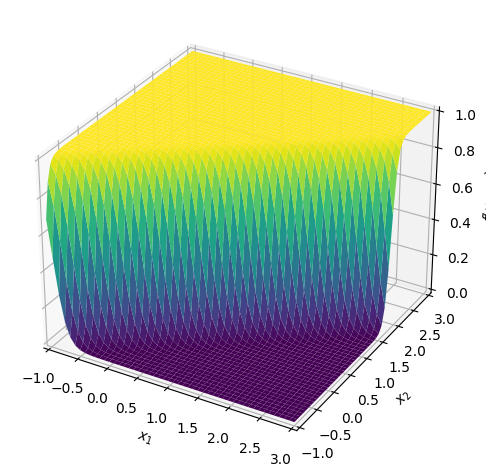

In [ ]:
# 첫 번째 은닉층의 출력 계산식 정의
h1= sigmoid.subs({'x': w1*x1 + w2*x2 + b1})
plot3d(h1.subs({'w1': -10.3267, 'w2': 14.3530, 'b1': 4.8114}), (x1, -1, 3), (x2, -1, 3))

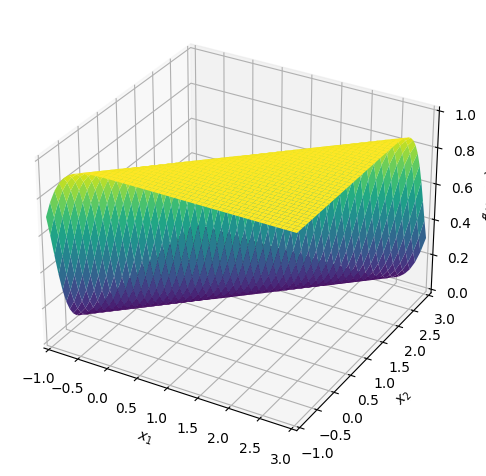

In [ ]:
# 두 번째 은닉층의 출력 계산식 정의
h2= sigmoid.subs({'x': w3*x1 + w4*x2 + b2})
plot3d(h2.subs({'w3': 5.6698, 'w4': -6.0909, 'b2':  0.4247}), (x1, -1, 3), (x2, -1, 3))

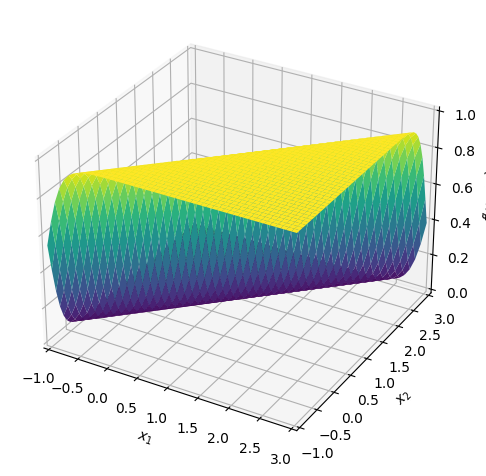

In [ ]:
# 세 번째 은닉층의 출력 계산식 정의
h3 = sigmoid.subs({'x': w5*x1 + w6*x2 + b3})
plot3d(h3.subs({'w5': 7.1937, 'w6': -7.3540, 'b3': 0.0227}), (x1, -1, 3), (x2, -1, 3))

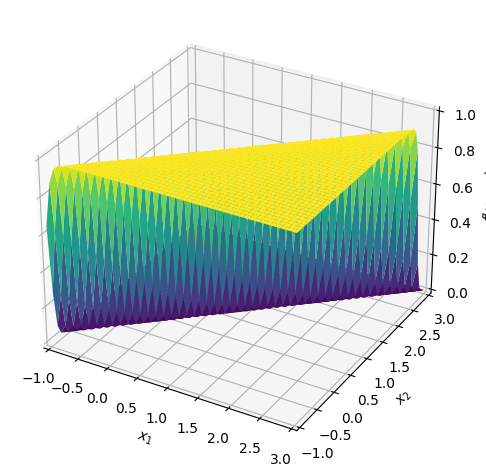

In [ ]:
# 네 번째 은닉층의 출력 계산식 정의
h4 = sigmoid.subs({'x': 17.7575*x1 - 19.4553*x2 - 1.0813})
plot3d(h4.subs({'w7': 17.7575, 'w8': -19.4553, 'b4': -1.0813}), (x1, -1, 3), (x2, -1, 3))

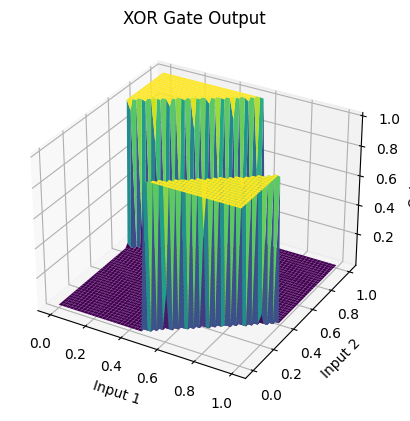

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_xor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)

class XOR(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(2, 2)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(2, 2)
        self.sigmoid2 = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(2, 2)
        self.sigmoid3 = torch.nn.Sigmoid()
        self.layer4 = torch.nn.Linear(2, 2)
        self.sigmoid4 = torch.nn.Sigmoid()
        self.layer5 = torch.nn.Linear(2, 1)
        self.sigmoid5 = torch.nn.Sigmoid()

    def forward(self, x):
        out = self.layer1(x)
        out = self.sigmoid(out)
        out = self.layer2(out)
        out = self.sigmoid2(out)
        out = self.layer3(out)
        out = self.sigmoid3(out)
        out = self.layer4(out)
        out = self.sigmoid4(out)
        out = self.layer5(out)
        out = self.sigmoid5(out)
        return out

xor_model = XOR()

# 학습된 파라미터 값 대입
xor_model.layer1.weight.data = torch.tensor([[-10.3267,  14.3530],
                                             [ -3.8846,   6.2506]])
xor_model.layer1.bias.data = torch.tensor([ 4.8114, -3.5770])
xor_model.layer2.weight.data = torch.tensor([[-4.5832,  5.1053],
                                             [ 6.1589, -5.0255]])
xor_model.layer2.bias.data = torch.tensor([ 1.5159, -3.0480])
xor_model.layer3.weight.data = torch.tensor([[ 5.6698, -6.0909],
                                             [-6.0369,  7.5744]])
xor_model.layer3.bias.data = torch.tensor([ 0.4247, -1.0466])
xor_model.layer4.weight.data = torch.tensor([[ 7.1937, -7.3540],
                                             [-7.5309,  7.5448]])
xor_model.layer4.bias.data = torch.tensor([0.0227, 0.0733])
xor_model.layer5.weight.data = torch.tensor([[ 17.7575, -19.4533]])
xor_model.layer5.bias.data = torch.tensor([-1.0813])

# 3차원 그래프 생성을 위한 입력 데이터 정의
x_values_xor = np.linspace(0, 1, 50)
y_values_xor = np.linspace(0, 1, 50)
xx_xor, yy_xor = np.meshgrid(x_values_xor, y_values_xor)
xy_xor = np.column_stack([xx_xor.ravel(), yy_xor.ravel()])
xy_tensor_xor = torch.tensor(xy_xor, dtype=torch.float)

# 각 점에서의 예측값 계산
with torch.no_grad():
    predictions_xor = xor_model(xy_tensor_xor).numpy().reshape(xx_xor.shape)

fig = plt.figure()
ax_xor = fig.add_subplot(111, projection='3d')
ax_xor.plot_surface(xx_xor, yy_xor, predictions_xor, cmap='viridis')

ax_xor.set_xlabel('Input 1')
ax_xor.set_ylabel('Input 2')
ax_xor.set_zlabel('Output')
ax_xor.set_title('XOR Gate Output')
plt.show()

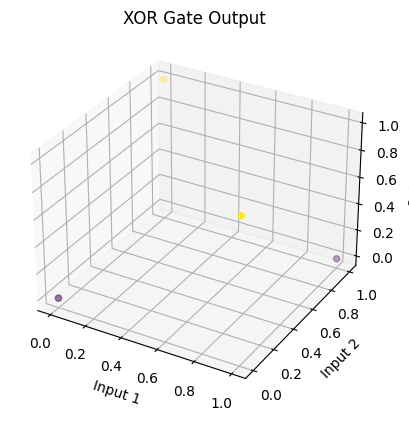

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# XOR 게이트를 위한 입력 데이터 정의
x_xor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)

class XOR(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(2, 2)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(2, 2)
        self.sigmoid2 = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(2, 2)
        self.sigmoid3 = torch.nn.Sigmoid()
        self.layer4 = torch.nn.Linear(2, 2)
        self.sigmoid4 = torch.nn.Sigmoid()
        self.layer5 = torch.nn.Linear(2, 1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.sigmoid(out)
        out = self.layer2(out)
        out = self.sigmoid2(out)
        out = self.layer3(out)
        out = self.sigmoid3(out)
        out = self.layer4(out)
        out = self.sigmoid4(out)
        out = self.layer5(out)
        return torch.sigmoid(out)

xor_model = XOR()

# 학습된 파라미터 값 대입
xor_model.layer1.weight.data = torch.tensor([[-10.3267,  14.3530],
                                             [ -3.8846,   6.2506]])
xor_model.layer1.bias.data = torch.tensor([ 4.8114, -3.5770])
xor_model.layer2.weight.data = torch.tensor([[-4.5832,  5.1053],
                                             [ 6.1589, -5.0255]])
xor_model.layer2.bias.data = torch.tensor([ 1.5159, -3.0480])
xor_model.layer3.weight.data = torch.tensor([[ 5.6698, -6.0909],
                                             [-6.0369,  7.5744]])
xor_model.layer3.bias.data = torch.tensor([ 0.4247, -1.0466])
xor_model.layer4.weight.data = torch.tensor([[ 7.1937, -7.3540],
                                             [-7.5309,  7.5448]])
xor_model.layer4.bias.data = torch.tensor([0.0227, 0.0733])
xor_model.layer5.weight.data = torch.tensor([[ 17.7575, -19.4533]])
xor_model.layer5.bias.data = torch.tensor([-1.0813])

# 각 입력 값에 대한 모델의 출력 계산
with torch.no_grad():
    outputs = xor_model(x_xor).squeeze().numpy()

# 입력 값과 출력 값의 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_xor[:, 0], x_xor[:, 1], outputs, c=outputs, cmap='viridis')

ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_zlabel('Output')
ax.set_title('XOR Gate Output')
plt.show()
